# get kepler EB catalog, ask:

In [1]:
! head -n12 ../doc/170127_Kepler_CBPs

Fri 27 Jan 2017 09:26:55 AM EST

QUESTIONS
1. How many detached EBs are in the Kirk+ EB catalog (e.g., re-generate that
distribution from the Martin Fabrycky Mazeh paper)?
2. With what period distribution?
3. With what observing baseline?
4. With what transit depths? (i.e., what precision is necessary to make the
detection?)
--------------------
Repeat above questions for what's looking like the HATN EB catalog.


In [2]:
pwd

'/home/luke/Dropbox/proj/cbp/notebooks'

In [3]:
ls

debinfo_170129.csv                lightcurve-work.ipynb
debpaths.csv                      make_merged_plots.ipynb
hatdat_170130.csv                 MAST_LC_sandbox.ipynb
hat_eb_catalog.ipynb              nb-data/
k2varcat_wrangle.ipynb            plots/
kepler_eb_catalog.ipynb           precision_comparison.ipynb
kepler_ebs_get_contact_ebs.ipynb  sigclip_test.ipynb
kepler_SAP_wrangling.ipynb        weirdpaths.csv


In [4]:
! head ../data/kepler_eb_catalog_v3.csv

##
## Kepler Eclipsing Binary Catalog
## Revision Date (Y/M/D): Aug. 9, 2016, 10:12 a.m.
## Download Date (Y/M/D): 
##
## Query String: 
##
#KIC,period,period_err,bjd0,bjd0_err,morph,GLon,GLat,kmag,Teff,SC,
10417986,0.0737309,0.0000000,55000.027476,0.004231,0.99,81.0390,11.0820,9.1280,-1.0000,True,
8912468,0.0948380,0.0000000,54953.576945,0.005326,0.98,80.1095,7.8882,11.7510,6194.0000,False,


In [5]:
from astropy.io import ascii
import numpy as np, matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
keb_path = '../data/kepler_eb_catalog_v3.csv'
cols = 'KIC,period,period_err,bjd0,bjd0_err,morph,GLon,GLat,kmag,Teff,SC'
cols = tuple(cols.split(','))

tab = ascii.read(keb_path)
currentcols = tab.colnames
for ix, col in enumerate(cols):
    tab.rename_column(currentcols[ix], col)
tab.remove_column('col12') # remnant of import

In [7]:
tab[:5]

KIC,period,period_err,bjd0,bjd0_err,morph,GLon,GLat,kmag,Teff,SC
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
10417986,0.0737309,0.0,55000.027476,0.004231,0.99,81.039,11.082,9.128,-1.0,True
8912468,0.094838,0.0,54953.576945,0.005326,0.98,80.1095,7.8882,11.751,6194.0,False
8758716,0.1072049,0.0,54953.672989,0.006197,1.0,77.7478,11.6565,13.531,-1.0,False
10855535,0.1127824,0.0,54964.629315,0.006374,0.99,79.3949,15.9212,13.87,7555.0,False
9472174,0.1257653,1e-07,54953.643178,0.018318,0.78,79.0187,11.6745,12.264,10645.0,True


In [8]:
len(tab)

2876

This is the total number of identified _eclipsing and ellipsoidal_ binary systems in the Kepler FoV.

They build it by:
```
(1) EB signature detection (Section 3); 
(2) data detrending: all intrinsic variability (such as chromospheric activity, etc.) and extrinsic variability (i.e., third light contamination and instrumental artifacts) are removed by the iterative fitting of the photometric baseline (Prša et al. 2011); 
(3) the determination of the ephemeris: the time-space data are phase-folded and the dispersion minimized; 
(4) Determination of ETVs (Section 8.6);
(5) analytic approximation: every light curve is fit by a polyfit (Prša et al. 2008); 
(6) morphological classification via Locally Linear Embedding (LLE; Section 6), a nonlinear dimensionality reduction tool is used to estimate the “detachedness” of the system (Matijevič et al. 2012, hereafter Paper III); 
(7) EB characterization through geometric analysis and 
(8) diagnostic plot generation for false positive (FP) determination. Additional details on these steps can be found in Papers I, II, III, and IV. 
```
For inclusion in this Catalog we accept bonafide EBs and systems that clearly exhibit binarity through photometric analysis (heartbeats and ellipsoidals (Section 8.1). Throughout the Catalog and online database we use a system of subjective flagging to label and identify characteristics of a given system that would otherwise be difficult to validate quantitatively or statistically. Examples of these flags and their uses can be seen in Section 8. Although best efforts have been taken to provide accurate results, we caution that not all systems marked in the Catalog are guaranteed to be EB systems. There remains the possibility that some grazing EB signals may belong to small planet candidates or are contaminated by non-target EB signals. An in-depth discussion on Catalog completeness is presented in Section 10

Reading the appropriate sections, the "detached" parameter, `morph`, means:

* <0.1: well-detached
* 0.1-0.5: detached
* 0.5-0.7: semi-detached
* 0.7-0.8: over-contact
* \>0.8: ellipsoidal variables.

(N.b. it was obtained via locally linear embedding, a nice ML technique, that maybe I should consider using!)

In [9]:
len(tab[tab['morph']<0.5])

1571

In [10]:
import pandas as pd
cbps = pd.read_csv('../data/all_kepler_cbps.csv', delimiter='|')
cbps.head()

,KIC,KOI,name,M_1,M_2,a_in,P_in,e_in,R_p,a_p,P_p,e_p,"\Delta I_p,in",a_crit,\delta_btransits1,\delta_btransits2,ref,reflink
0,NaN,NaN,NaN,M_\odot,M_\odot,au,days,unitless,R_\oplus,au,days,unitless,deg,au,NaN,NaN,NaN,NaN
1,12644769.0,1611,16,0.69,0.2,0.22,40.1,0.16,8.27,0.71,228.8,0.01,0.31,0.64,0.0160,0.0010,Doyle et al. (2011),http://www.sciencemag.org/cgi/doi/10.1126/scie...
2,8572936.0,2459,34,1.05,1.02,0.23,28,0.52,8.38,1.09,288.8,0.18,1.86,0.84,0.0030,0.0025,Welsh et al. (2012),http://www.nature.com/doifinder/10.1038/nature...
3,9837578.0,2937,35,0.89,0.81,0.18,20.7,0.14,7.99,0.6,131.4,0.04,1.07,0.5,0.0040,0.0020,Welsh et al. (2012),http://www.nature.com/doifinder/10.1038/nature...
4,6762829.0,1740,38,0.95,0.26,0.15,18.8,0.1,4.35,0.47,106,0.07,0.18,0.39,0.0005,0.0005,Orosz et al. (2012b),http://stacks.iop.org/0004-637X/758/i=2/a=87


In [11]:
cbps = cbps.drop(0, axis=0)

In [12]:
cbps

,KIC,KOI,name,M_1,M_2,a_in,P_in,e_in,R_p,a_p,P_p,e_p,"\Delta I_p,in",a_crit,\delta_btransits1,\delta_btransits2,ref,reflink
1,12644769.0,1611,16,0.69,0.2,0.22,40.1,0.16,8.27,0.71,228.8,0.01,0.31,0.64,0.0160,0.0010,Doyle et al. (2011),http://www.sciencemag.org/cgi/doi/10.1126/scie...
2,8572936.0,2459,34,1.05,1.02,0.23,28,0.52,8.38,1.09,288.8,0.18,1.86,0.84,0.0030,0.0025,Welsh et al. (2012),http://www.nature.com/doifinder/10.1038/nature...
3,9837578.0,2937,35,0.89,0.81,0.18,20.7,0.14,7.99,0.6,131.4,0.04,1.07,0.5,0.0040,0.0020,Welsh et al. (2012),http://www.nature.com/doifinder/10.1038/nature...
4,6762829.0,1740,38,0.95,0.26,0.15,18.8,0.1,4.35,0.47,106,0.07,0.18,0.39,0.0005,0.0005,Orosz et al. (2012b),http://stacks.iop.org/0004-637X/758/i=2/a=87
5,10020423.0,"3154, 7273",47b,1.04,0.36,0.08,7.4,0.02,2.98,0.3,49.5,0.04,0.27,0.2,0.0012,0.0012,Orosz et al. (2012a),http://www.sciencemag.org/cgi/doi/10.1126/scie...
6,10020423.0,"3154, 7273",47d,1.04,0.36,0.08,7.4,0.02,NaN,0.72,187.3,NaN,NaN,0.2,NaN,NaN,Orosz et al. (2015),http://adsabs.harvard.edu/abs/2015ESS.....340201W
7,10020423.0,"3154, 7273",47c,1.04,0.36,0.08,7.4,0.02,4.61,0.99,303.1,<.41,1.16,0.2,0.0020,0.0020,Orosz et al. (2012a),http://www.sciencemag.org/cgi/doi/10.1126/scie...
8,4862625.0,6464,PH-1/64,1.5,0.4,0.18,20,0.21,6.18,0.65,138.5,0.07,2.81,0.54,0.0015,NaN,"Schwamb et al. (2013), Kostov et al. (2013)",http://iopscience.iop.org/article/10.1088/0004...
9,12351927.0,7522,413,0.82,0.54,0.1,10.1,0.04,4.34,0.36,66.3,0.12,4.02,0.26,0.0030,0.0020,Kostov et al. (2014),http://iopscience.iop.org/article/10.1088/0004...
10,9632895.0,"1451 (FP), 3151",453,0.93,0.19,0.18,27.3,0.05,6.17,0.79,240.5,0.04,2.9,0.44,0.0050,NaN,Welsh et al. (2015),http://iopscience.iop.org/article/10.1088/0004...


<IPython.core.display.Javascript object>


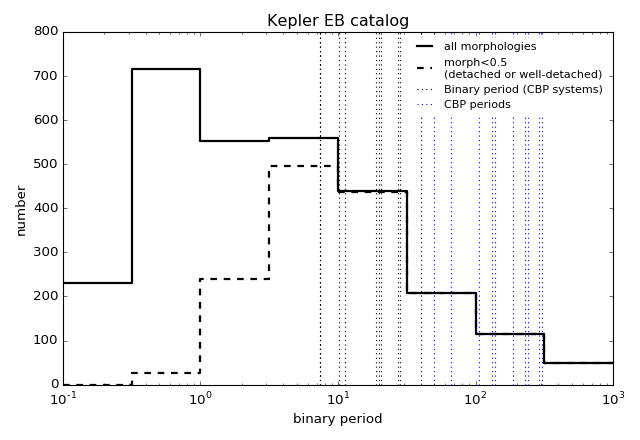

In [13]:
bins = np.logspace(-1,3,9)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[tab['morph']<0.5]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps--', lw=2, c='k', label='morph<0.5\n(detached or well-detached)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(cbps['P_p'], ylims[0], ylims[1], color='b', linestyles=':', label='CBP periods')

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period', ylabel='number', title='Kepler EB catalog')
f.tight_layout()
f.savefig('plots/kepler_eb_period_histogram_bigbins.pdf')
f.show()

In [14]:
len(tab[tab['morph']<0.5]['period'])

1571

<IPython.core.display.Javascript object>


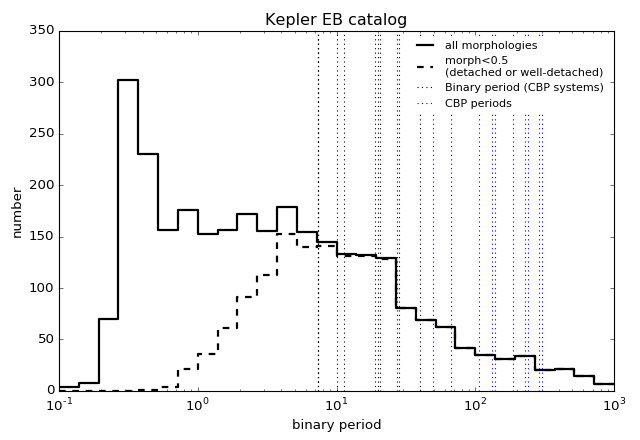

In [15]:
bins = np.logspace(-1,3,29)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[tab['morph']<0.5]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps--', lw=2, c='k', label='morph<0.5\n(detached or well-detached)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(cbps['P_p'], ylims[0], ylims[1], color='b', linestyles=':', label='CBP periods')

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period', ylabel='number', title='Kepler EB catalog')
f.savefig('plots/kepler_eb_period_histogram_smallbins.pdf')
f.tight_layout()
f.show()

We want to overplot where known Kepler EBs are.

Then OOM: what is the total "size" of the detached EB dataset?

Note it's mostly 30 minute ("long") cadence for these targets. (I think).
If not, it's 1 minute ("short") cadence.

In [16]:
points_per_hr = 2
points_per_d = points_per_hr * 24.
points_per_yr = points_per_d * 365.25
points_tot = points_per_yr * 4
days_tot_obsd = 4*365.25

In [17]:
points_tot

70128.0

In [18]:
days_tot_obsd

1461.0

Kepler dataset: 1461 days of continuous observation, for 1571 detached EBs.                               

In [19]:
print('{:.4g} detached EB days of data'.format(1461*1571))

2.295e+06 detached EB days of data


# 170221: coming back, with a bias

What if we looked at the distribution, but for the EBs that were actually searched, e.g., by Armstrong et al.?

<IPython.core.display.Javascript object>


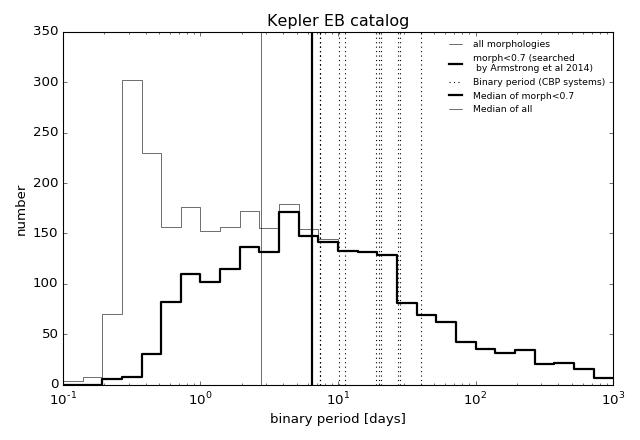

In [20]:
bins = np.logspace(-1,3,29)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[tab['morph']<0.7]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=0.5, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps-', lw=2, c='k', label='morph<0.7 (searched\n by Armstrong et al 2014)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(np.median(tab[tab['morph']<0.7]['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=2, label='Median of morph<0.7')
ax.vlines(np.median(tab['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=0.5, label='Median of all')

leg = ax.legend(loc='best', fontsize='x-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period [days]', ylabel='number', title='Kepler EB catalog')
f.tight_layout()
f.savefig('plots/kepler_eb_period_histogram_morph_corrected.pdf')
f.show()

In [21]:
len(tab[tab['morph']<0.7])

1997

Note Armstrong et al. claim to have looked at 1735 binaries -- close but a bit different.

In [22]:
len(tab)

2876

Armstrong et al. said their catalog length was 2610, queried online 2013 September 18.

What has happened in KEBC land since then?

Uh... looking at http://keplerebs.villanova.edu/papers, it's that Conroy et al. 2014(b), LaCourse et al (2015) were looking at K2 binaries (?!). Ah but this is OK -- the K2 data are being included in the catalog, but they're a secondary source and not in our data.

But all this said -- if we're assessing based on the Armstrong paper, it'd make sense to use the catalog they actually used. (Similar for Welsh et al. papers -- so KEBC v2).




In [23]:
2876-2610

266

Looking around at http://keplerebs.villanova.edu/papers, it looks like this cached version of the catalog (2013 September 18) no longer exists.

Kirk et al 2016 help explain where the new stuff came from.

Paper II (v2, while Armstrong et al used some kind of mix) had 2165 objects.

Paper VII (v3, Kirk et al) has 2878 objects. Where did the extras come from? Which ones were in Armstrong's catalog?

Extra candidates came from:

1. Rejected KOI planet candidates.
    (i.e. from transiting planet searches, they were kept)
2. Eclipsing binary factory (Parvizi et al 2014). Fully automated / adaptive / end-to-end pipeline to classify EB LCs.
   *Designed* to allow archival data mining from time-series photometry surveys.
   Modules' parameters are tunable to the characteristics of input data (photometric precision, data cadenece, uncertainties...)
3. Planet hunters
4. Increased baseline revisions.

So UNCLEAR whether the extra 266 stars (about a 10% of the catalog effect) have a lop-sided period bias. If anything I would think that they might tend to be longer period (driving the median towards longer periods, not shorter periods), assuming that most come from rejected KOI planet candidates.

Let's just assume that the current version is close enough.


<IPython.core.display.Javascript object>


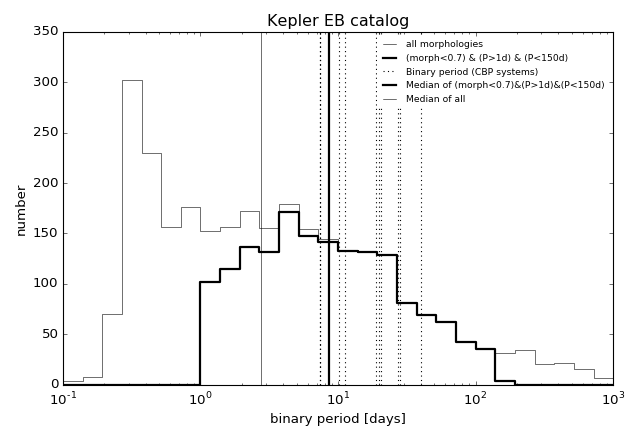

In [24]:
bins = np.logspace(-1,3,29)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[(tab['morph']<0.7)&(tab['period']>1)&(tab['period']<150)]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=0.5, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps-', lw=2, c='k', label='(morph<0.7) & (P>1d) & (P<150d)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(np.median(tab[(tab['morph']<0.7)&(tab['period']>1)&(tab['period']<600)]['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=2, label='Median of (morph<0.7)&(P>1d)&(P<150d)')
ax.vlines(np.median(tab['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=0.5, label='Median of all')

leg = ax.legend(loc='best', fontsize='x-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period [days]', ylabel='number', title='Kepler EB catalog')
f.tight_layout()
f.savefig('plots/kepler_eb_period_histogram_morphperiod_corrected.pdf')
f.show()

Keep in mind: the general idea here is that the thick black line should be _the EBs to which we are actually sensitive to CBPs_.

Not "all EBs which exist".

The observed CBP detections will not have happened around
1. Long period EBs (P_b ~> 150 days, if we require at least two Kepler transits and within stability limit (P_p ~ 4x P_b = 600d here). (Note this ignores the question of transit probability, which decreases greatly at long periods too).
2. P<1d EBs or morph<0.7 EBs (based on the observed bottom period in the SD State / Kepler search, and on Armstrong et al.'s sample cut, respectively).
3. Short-period EBs which transit, but are inclined with respect to the line of sight angle, so that any CBPs they host do not transit (assuming 0 degrees mutual inclination, or increasingly greater sensitivity for greater spread in the inclination distriubtion).

1 and 2 are accounted for in the above plot.

3 is not, and is a further observational bias against detecting planets around short-period binaries.

N.b. it seems more important for short-period binaries where you might have _very inclined_ systems that can still transit (while if the binary period is longer, you need the inclination angle to be closer to 90 degrees).



Reading the appropriate sections, the "detached" parameter, `morph`, means:

* <0.1: well-detached
* 0.1-0.5: detached
* 0.5-0.7: semi-detached
* 0.7-0.8: over-contact
* \>0.8: ellipsoidal variables.



Note page 8 of Armstrong et al (2014) has an important paragraph that I previously missed and should parse before going deeper:
```
Finally, it has also been proposed that there is a preference for
CBs to have longer period binary hosts (Welsh et al. 2014). All of
the known planets so far orbit binaries with periods greater than 7d,
despite these longer period binaries being significantly undersam-
pled in the Kepler data set. We are able to test whether this effect is
due to a sampling bias or represents a real trend using our debiased
sample. We split the sample into short- and long-period binaries,
using a period cut of 10 d. For coplanar CB planets with periods
less than 10.2P bin , we find the probability that the occurrence rate is
lower around shorter period binaries to be 96.3 per cent (4–10R ⊕ ),
97.7 per cent (6–10R ⊕ ) and 95.6 per cent (8–10R ⊕ ). This becomes
more significant for more misaligned inclination distributions, ris-
ing to 99.9 per cent for the 5 ◦ Gaussian case and higher. Using a
binary period cutoff at seven days (below all published CB planets)
reduces the significance of the result, to a 92.6 per cent probability
for the 6–10R ⊕ sample. This again becomes more significant for
more misaligned distributions.
```

This was referenced in Martin, Fabrycky, and Triaud (2015):
```
(i) The planets have all been discovered orbiting eclipsing bi-
naries of relatively long periods. In Fig. 1a we demonstrate this
feature by plotting a histogram of the Kepler eclipsing binary peri-
ods, which has a median of 2.7 d (blue solid vertical line). The red
dashed vertical lines indicate the binary periods around which plan-
ets have been found, of which the shortest is P in = 7.4 d (Kepler-
47). Armstrong et al. (2014) analysed the Kepler lightcurves using
an automated search algorithm and debiasing process, and came to
the conclusion that planets are significantly rarer around binaries of
periods between 5 and 10 d than around wider binaries. Martin &
Triaud (2014) created synthetic circumbinary distributions and sim-
ulated eclipses and transits observable by Kepler. They concluded
that the number of discoveries would have been roughly doubled
if the circumbinary abundance did not drop around binaries with
periods shorter than 5 d.
```

Woah, so this must mean that Armstrong et al (2014) figured out inclination angles that all the short-period binaries were being observed at! (Because if you're injecting planets with some mutual inclination... you'd have to).

Page 5 of Armstrong et al (2014):

```
Many of the necessary binary parameters are already known and
were used as described in Section 2.1. Binary inclinations were
drawn uniformly across the range within which they would still at
least partially eclipse. It is critical to include the binary inclina-
tion variation, as for preferentially coplanar planets on much larger
semimajor axes a change of a few degrees can have significant
consequences for observability.
```

So... I think the above needs good R_star/a_bin values, at least?

```
The KEBC provides us with period information for the binary
sample. In addition, data are available on the locations and widths
of the primary and secondary binary eclipses. With these, eccentric-
ity parameters were calculated. Where insufficient polyfit informa-
tion was available (generally due to non-detection of the secondary
eclipse), we set the binary eccentricity to zero. Temperature infor-
mation on the sample was obtained from Armstrong et al. (2013).
We generated main-sequence calibrated stellar radii and masses
from these, using the calibration of Torres, Andersen & Gim ́enez
(2010) with surface gravity 4.5 and solar metallicity. The lower mass
limit for this process was 0.6 M  – below this the calibrations of
Boyajian et al. (2012) were used. Between 0.6 and 0.8 M  , in the
valid range of both calibrations, we interpolated between them to
ensure no discontinuity.
```

So... they're assuming all of these EBs are on the main sequence. They're getting ballpark (i.e. ~factor of ~30%) temperatures from the light curves, then likely factors of ~2 masses and radii Torres et al. (2010) relations. They're assuming a fixed surface gravity (wat) and solar metallicity (wat) to do this. It requires heavy extrapolation at the low mass star end.

__
Can we come up with a more general (i.e. less assumption-laden) description of what we expect the inclination distribution of the eclipsing binaries to be, as a function of period?__

__Relate this to Gongjie's paper and the probability of then getting transits.
__




Related question: how is this morphology parameter obtained for single-eclipsing binaries?


Aside from this, 
how sensitive were they to transiting planets that they injected around the shorter period eclipsing binaries, b/c those shorter period binaries have noisier light curves?

```
Our recovery rate varied
between ∼10 per cent of the total stable sample for the most dif-
ficult 300d, 4R ⊕ case, and ∼55 per cent for the 10.2P bin , 10R ⊕
case. To check these, surprisingly low sample sizes, a subsample
of the failed systems were examined to determine the cause of the
recovery failure. In ∼50 per cent of R p = 10R ⊕ cases, this was
light-curve noise or stellar activity dominating the transit signal
depth. A further sixth of the failed cases were due to remnants of
binary eclipses, with another sixth due to short light curves (gen-
erally under 1 yr) which were not long enough to show multiple
transits. The remainder was due to transits falling in gaps in the
light curve, with a few per cent finding the correct injected period
but at too low significance. We note that dilution by the secondary
star in general had a large effect on the transit depths, resulting
in transits significantly shallower than would be expected for e.g.
10R ⊕ planets around single star
```

Proceeding with ad-hoc magic order-of-magnitude, might-be-fooling-myself numbers:

In [25]:
bins = np.logspace(-1,3,29)
for val, bn in zip(detachedvals, bins):
    print('{:.3g},\t\t{:d}'.format(bn, val))

0.1,		0
0.139,		0
0.193,		0
0.268,		0
0.373,		0
0.518,		0
0.72,		0
1,		0
1.39,		102
1.93,		115
2.68,		137
3.73,		132
5.18,		171
7.2,		147
10,		142
13.9,		133
19.3,		132
26.8,		129
37.3,		81
51.8,		69
72,		62
100,		42
139,		35
193,		4
268,		0
373,		0
518,		0
720,		0
1e+03,		0


/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


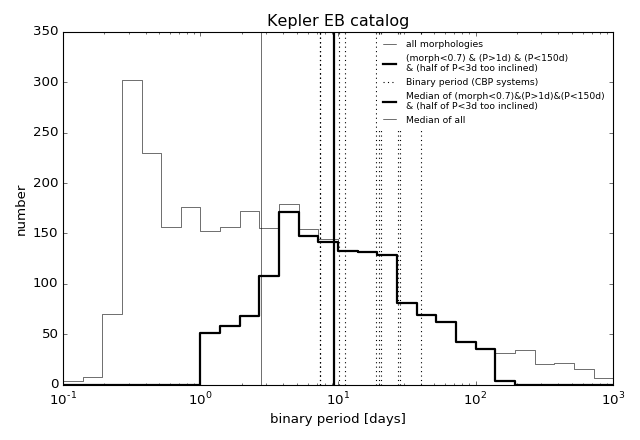

In [26]:
bins = np.logspace(-1,3,29)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

ebperiods = np.array(tab[(tab['morph']<0.7)&(tab['period']>1)&(tab['period']<150)]['period'])
# say half of P<3 day binaries are in fact inclined, so aligned planets do not transit
FUDGEFACTOR = 0.5
FUDGEPERIOD = 3

shortperiods = ebperiods[ebperiods<FUDGEPERIOD][::1/FUDGEFACTOR]
longperiods = ebperiods[ebperiods>FUDGEPERIOD]

fudgedperiods = np.concatenate((shortperiods, longperiods))

detachedvals, binedge = np.histogram(fudgedperiods, bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=0.5, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps-', lw=2, c='k', label='(morph<0.7) & (P>1d) & (P<150d)\n& (half of P<3d too inclined)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(np.median(fudgedperiods), ylims[0], ylims[1], color='k', 
          linestyles='-', lw=2, label='Median of (morph<0.7)&(P>1d)&(P<150d)\n& (half of P<3d too inclined)')
ax.vlines(np.median(tab['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=0.5, label='Median of all')

leg = ax.legend(loc='best', fontsize='x-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period [days]', ylabel='number', title='Kepler EB catalog')
f.tight_layout()
f.savefig('plots/kepler_eb_period_histogram_morphperiodinclfudge3_corrected.pdf')
f.show()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


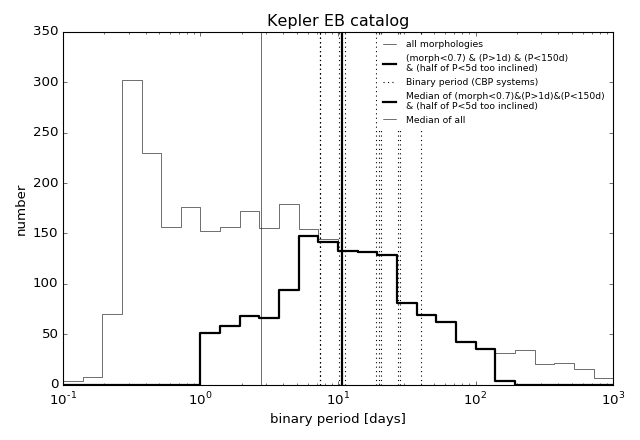

In [27]:
bins = np.logspace(-1,3,29)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

ebperiods = np.array(tab[(tab['morph']<0.7)&(tab['period']>1)&(tab['period']<150)]['period'])
# say half of P<5 day binaries are in fact inclined, so aligned planets do not transit
FUDGEFACTOR = 0.5
FUDGEPERIOD = 5

shortperiods = ebperiods[ebperiods<FUDGEPERIOD][::1/FUDGEFACTOR]
longperiods = ebperiods[ebperiods>FUDGEPERIOD]

fudgedperiods = np.concatenate((shortperiods, longperiods))

detachedvals, binedge = np.histogram(fudgedperiods, bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=0.5, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps-', lw=2, c='k', label='(morph<0.7) & (P>1d) & (P<150d)\n& (half of P<5d too inclined)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(np.median(fudgedperiods), ylims[0], ylims[1], color='k', 
          linestyles='-', lw=2, label='Median of (morph<0.7)&(P>1d)&(P<150d)\n& (half of P<5d too inclined)')
ax.vlines(np.median(tab['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=0.5, label='Median of all')

leg = ax.legend(loc='best', fontsize='x-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period [days]', ylabel='number', title='Kepler EB catalog')
f.tight_layout()
f.savefig('plots/kepler_eb_period_histogram_morphperiodinclfudge5_corrected.pdf')
f.show()

In [28]:
np.array(ebperiods)

array([   1.0008312,    1.0049085,    1.0096716, ...,  141.7337805,
        143.1192631,  147.2884485])

In [29]:
detachedvals

array([  0,   0,   0,   0,   0,   0,   0,   0,  51,  58,  68,  66,  94,
       147, 142, 133, 132, 129,  81,  69,  62,  42,  35,   4,   0,   0,
         0,   0,   0])

In [30]:
! pdftk plots/kepler_eb_period_histogram_morph_corrected.pdf plots/kepler_eb_period_histogram_morphperiod_corrected.pdf plots/kepler_eb_period_histogram_morphperiodinclfudge3_corrected.pdf plots/kepler_eb_period_histogram_morphperiodinclfudge5_corrected.pdf output plots/kebc_periodhist_phack.pdf

Turns the pdfs made above into a nice single document to leaf through.

OK, fine. But really "half" is a fudged number, and it would be nice to have a physical idea of at what _binary period_ we expect the fact that they are observed to transit / be highly ellipsoidally variable to at all constrain their inclination.

The way to do this is a mix of analytics (Gongjie's paper) and Monte Carlo.

We want: 

```probability(coplanar planet transits [and thus is detectable by Kepler]|kepler finds inner binary with known period P_b, stellar radii and masses)```

for which a first step is

```probability(inclination of EB | KEBC found the EB with known period P_b, stellar radii and masses)```

<IPython.core.display.Javascript object>


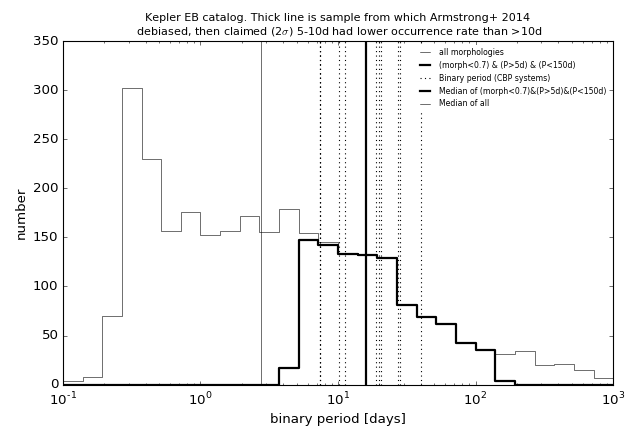

In [46]:
bins = np.logspace(-1,3,29)

allvals, binedge = np.histogram(tab['period'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

detachedvals, binedge = np.histogram(tab[(tab['morph']<0.7)&(tab['period']>5)&(tab['period']<150)]['period'], bins=bins)
detachedvals = np.insert(detachedvals, 0, detachedvals[0])

f, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=0.5, c='k', label='all morphologies')
ax.semilogx(bins, detachedvals, ls='steps-', lw=2, c='k', label='(morph<0.7) & (P>5d) & (P<150d)')
ylims = ax.get_ylim()
ax.vlines(cbps['P_in'], ylims[0], ylims[1], color='k', linestyles=':', label='Binary period (CBP systems)')
ax.vlines(np.median(tab[(tab['morph']<0.7)&(tab['period']>5)&(tab['period']<150)]['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=2, label='Median of (morph<0.7)&(P>5d)&(P<150d)')
ax.vlines(np.median(tab['period']), ylims[0], ylims[1], color='k', linestyles='-', lw=0.5, label='Median of all')

leg = ax.legend(loc='best', fontsize='xx-small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='binary period [days]', ylabel='number')
ax.set_title('Kepler EB catalog. Thick line is sample from which Armstrong+ 2014\n debiased, then claimed (2$\sigma$) 5-10d had lower occurrence rate than >10d',
            fontsize='small')
f.tight_layout()
f.savefig('plots/kepler_eb_period_histogram_armstrong_sample.pdf')
f.show()

In [47]:
! pdftk plots/kepler_eb_period_histogram_armstrong_sample.pdf plots/kepler_eb_period_histogram_morph_corrected.pdf plots/kepler_eb_period_histogram_morphperiod_corrected.pdf plots/kepler_eb_period_histogram_morphperiodinclfudge3_corrected.pdf plots/kepler_eb_period_histogram_morphperiodinclfudge5_corrected.pdf output plots/kebc_periodhist_phack.pdf